In [1]:
import rawpy
import numpy as np
from scipy.ndimage.filters import convolve

from matplotlib.pyplot import imshow, plot
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["figure.figsize"] = 10, 15

In [2]:
def imshowint(img):
    imshow(np.clip(img, 0, 255).astype(np.uint8))

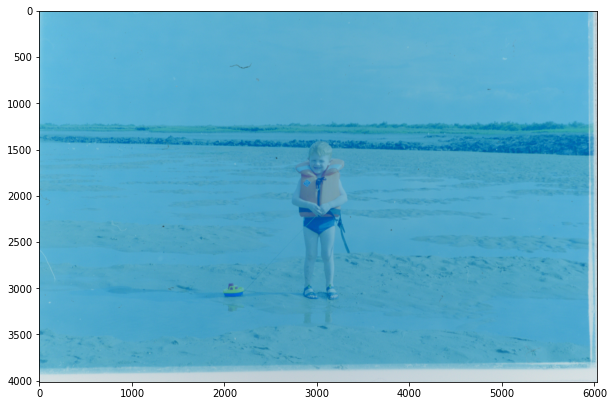

In [3]:
raw = rawpy.imread("./neg2.NEF")
rgbi = raw.postprocess()
rgb = np.ones(rgbi.shape, dtype = np.uint8)*255-rgbi
imshow(rgb)

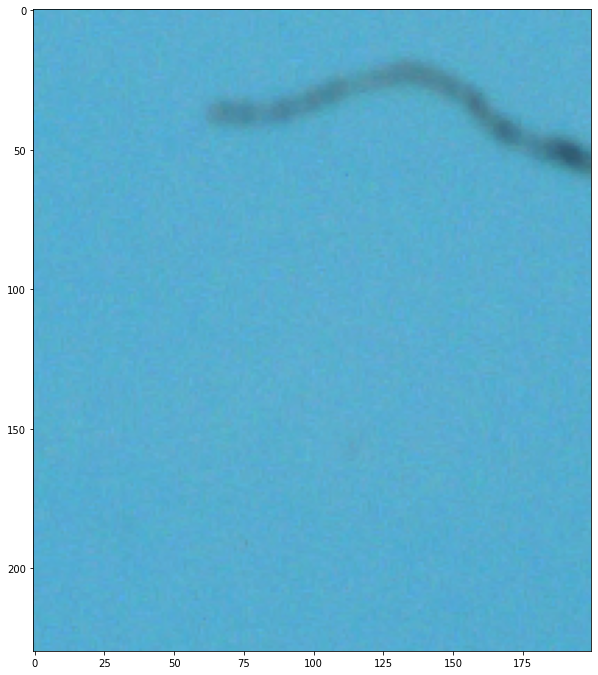

In [4]:
imshow(rgb[570:800, 2000:2200,:])
awb = rgb[570:800, 2000:2200,:].mean((0,1))

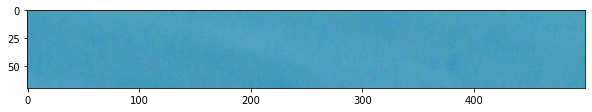

In [5]:
imshow(rgb[3110:3180, 3500:4000,:])
# awb = rgb[570:800, 2000:2200,:].mean((0,1))

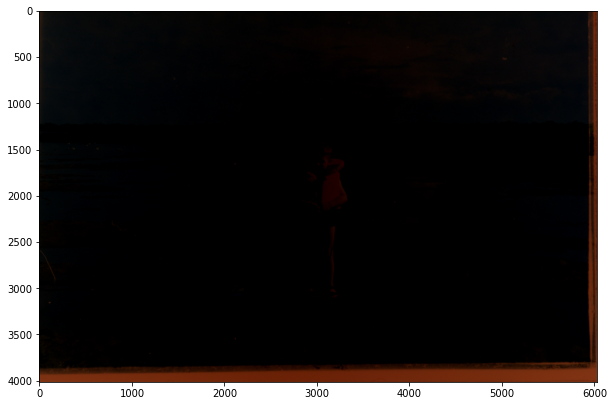

In [6]:
wbd = rgb-awb
imshowint(wbd)

(1920, 3030, 3)

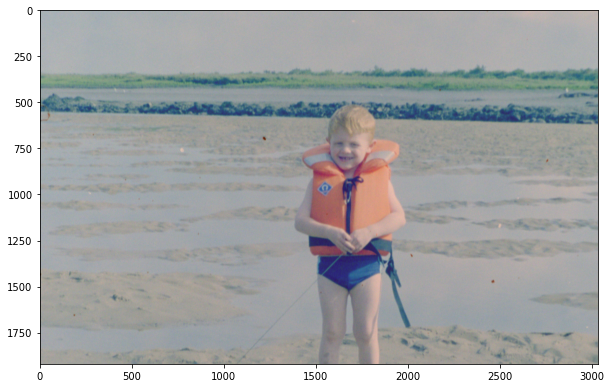

In [7]:
cropped = wbd[900:2820, 1350:4380]
firsttry = (cropped-np.min(cropped))*255/(np.max(cropped)-np.min(cropped))
imshowint(firsttry)
cropped.shape

In [8]:
# raw.raw_image_visible.copy()
# raw.rgb_xyz_matrix
# raw.rgb_xyz_matrix
raw.raw_image_visible
raw.raw_colors_visible
zeros = np.zeros((*raw.raw_image_visible.shape, 3), dtype=np.uint16)
ohs = np.concatenate((zeros, raw.raw_image_visible.reshape(*raw.raw_image_visible.shape, 1)), axis=2)
ohs.shape



(4012, 6034, 4)

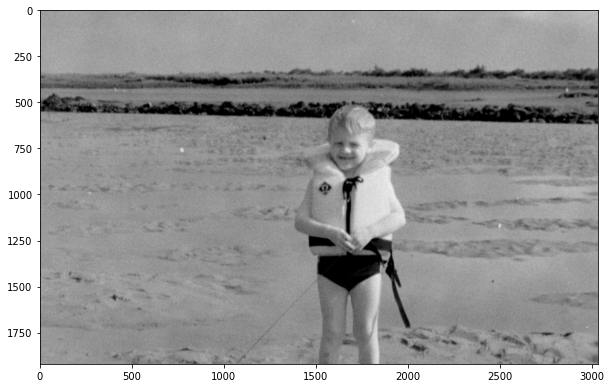

In [9]:
H_G = np.asarray(
        [[0, 1, 0],
         [1, 4, 1],
         [0, 1, 0]], dtype=np.float64 ) / 4

H_RB = np.asarray(
    [[1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]], dtype=np.float64) / 4
imshow(convolve(firsttry[:,:,0], H_G), cmap="gray")

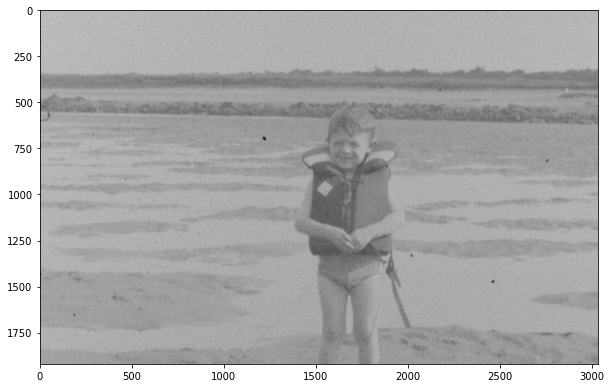

In [10]:

imshow(firsttry[:,:,2], cmap="gray")

In [11]:
# raw.raw_colors_visible
# raw.raw_image_visible
# (raw.raw_colors_visible==2)*1
imcopy = raw.raw_image_visible.copy()

pog = np.concatenate((
    convolve((imcopy*(raw.raw_colors_visible==0)), H_RB)[:,:,np.newaxis],
    convolve((imcopy*(raw.raw_colors_visible==1)), H_G)[:,:,np.newaxis],
    convolve((imcopy*(raw.raw_colors_visible==2)), H_RB)[:,:,np.newaxis],
), axis=2)
cupog = raw.tone_curve[pog]
print(pog)
# (raw.raw_image_visible*(raw.raw_colors_visible==0))[:,:,np.newaxis]

[[[146  34  10]
  [100  85  20]
  [103  49  19]
  ...
  [ 40  70  22]
  [ 46  43  22]
  [ 23  93  33]]

 [[ 99  85  20]
  [ 68  69  40]
  [ 70  67  38]
  ...
  [ 26  56  45]
  [ 29  55  44]
  [ 14  41  66]]

 [[100  51  18]
  [ 69  73  37]
  [ 72  66  37]
  ...
  [ 26  56  43]
  [ 27  53  44]
  [ 13  58  69]]

 ...

 [[ 28  36  13]
  [ 18  32  26]
  [ 18  31  26]
  ...
  [ 20  35  30]
  [ 19  38  29]
  [  9  26  43]]

 [[ 28  23  13]
  [ 17  32  26]
  [ 16  32  27]
  ...
  [ 18  40  28]
  [ 19  37  29]
  [  9  38  45]]

 [[ 14  49  19]
  [  8  24  39]
  [  8  42  44]
  ...
  [  9  29  39]
  [  9  51  43]
  [  4  18  72]]]


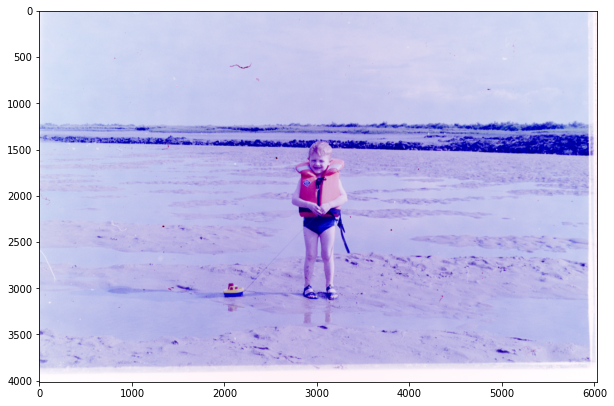

In [16]:
pogcucrop = raw.tone_curve[pog]#[900:2820, 1350:4380]#
mi, ma = np.percentile(pogcucrop, 1), np.percentile(pogcucrop, 99)
# print(mi, ma)
levels = (1-(pogcucrop-mi)/(ma-mi))*255

imshowint(levels)

[140.042      139.38423913  74.28693478]
25.0 351.0


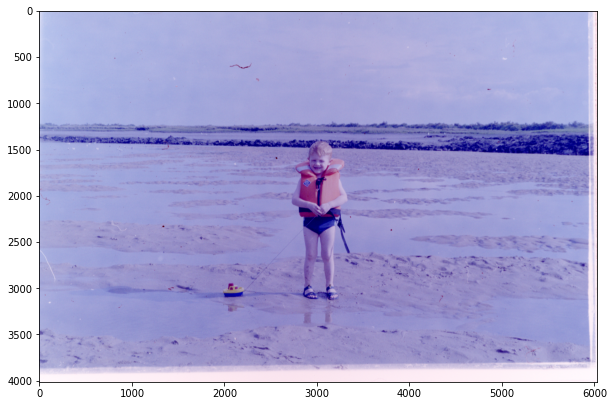

In [17]:
poguncrop = pog
pogtwb = pog#[900:2820, 1350:4380]
# print(pogtwb)
pogawb = poguncrop[570:800, 2000:2200,:].mean((0, 1))
print(pogawb)
# pogtwb = pogtwb pogawb

mi, ma = np.percentile(pogtwb, 0.5), np.percentile(pogtwb, 99.5)
print(mi, ma)#, pogawb)
levels = (1-(pogtwb-mi)/(ma-mi))*255

imshowint(levels)

# imshow(1-(pogtwb-pogtwb.min())/(pogtwb.max()-pogtwb.min()))
# imshow((poguncrop-poguncrop.min())/(poguncrop.max()-poguncrop.min()))



[19. 38. 30.] [358. 387. 205.]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


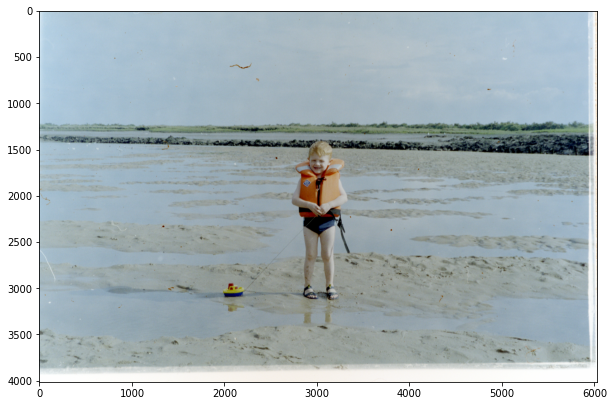

In [45]:
poguncrop = pog#raw.tone_curve[pog]
pogtwb = pog#raw.tone_curve[pog]
# print(pogtwb)
stre = 1
pogawbb = np.percentile(poguncrop, 0.5,(0, 1)) * stre
pogawbw = np.percentile(poguncrop, 99.5,(0,1)) * stre
print(pogawbb, pogawbw)
# pogtwb = pogtwb pogawb

# pogwb = 1-(pogtwb-pogawbw)/(pogawbb-pogawbw)
# mi, ma = np.percentile(pogtwb, 0.05), np.percentile(pogtwb, 99.95)
# print(mi, ma)#, pogawb)
# levels = (1-(pogtwb-mi)/(ma-mi))*255

# imshowint(levels)

imshow((pogtwb-pogawbw)/(pogawbb-pogawbw))
# imshow((poguncrop-poguncrop.min())/(poguncrop.max()-poguncrop.min()))